# ML-Fundamentals - Neural Networks - Exercise: Minimal Fully Connected Network for MNIST

## Table of Contents
* [Requirements](#Requirements) 
  * [Modules](#Python-Modules) 
  * [Data](#Data)
* [Simple MNIST Network](#Simple-MNIST-Network)
  * [Todo: Transparency](#Todo:-Transparency)
  * [Todo: Comprehension](#Todo:-Comprehension)
  * [Todo: Step towards a NN-Framework](#Todo:-Step-towards-a-NN-Framework)

# Requirements


## Python-Modules

In [1]:
# third party
import numpy as np
import matplotlib.pyplot as plt

# internal
from deep_teaching_commons.data.fundamentals.mnist import Mnist

## Data

In [16]:
# create mnist loader from deep_teaching_commons
mnist_loader = Mnist(data_dir='data')

# load all data, labels are one-hot-encoded, images are flatten and pixel squashed between [0,1]
train_images, train_labels, test_images, test_labels = mnist_loader.get_all_data(one_hot_enc=True, normalized=True)

# shuffle training data
shuffle_index = np.random.permutation(60000)
train_images, train_labels = train_images[shuffle_index], train_labels[shuffle_index]

auto download is active, attempting download
mnist data directory already exists, download aborted


# Simple MNIST Network
The presented network is an adaptation of Michael Nielson's introductory example to neural networks. It is recommended, though not necessary, to read the first two chapters of his great online book ['Neural Networks and Deep Learning'](http://neuralnetworksanddeeplearning.com/) for a better understanding of the given example. Compared to the [original](https://github.com/mnielsen/neural-networks-and-deep-learning/blob/master/src/network.py) by Nielsen, the present variant was vectorized and the sigmoid activation function replaced by a rectified linear unit function (ReLU). As a result, the code is written much more compact, and the optimization of the model is much more efficient. 

## Todo: Transparency
Your goal is to understand how the implementation works. Therefore you can do the following:
  - Add comments to functions and lines of code. Follow the [Google-Pyhton](https://google.github.io/styleguide/pyguide.html) guidelines for comments.
  - Add a verbose argument (`boolean`) to the functions that adds meaningful `print` lines to the network, if it is `true`.
  - Add a variable `delta_hist` which store the delta value calculated on the output layer during each iteration of the function `grads(X,Y,weights)`. After the optimization process plot `delta_hist`.
  
Hopefully, this implementation of a neural network is clear after your investigation. You should be able to answer following questions:
  - Which cost function is used, what is its derivation and how is it implemented?
      - The network uses softmax as loss function
  - Why are the boundaries of your plot between [-1,0], why it is so noisy, how do you can reduce the noice and what is the difference to a usual plot of a loss function?
      - There is noise because of the batch gradient descent. To reduce the noice you need to choose a bigger batch size. [-1,0] because the loss is always positive?
  - How does the network implement the backpropagation algorithm?

In [5]:
delta_hist =[]

def feed_forward(X, weights):
    """Preforms the forward pass.
    
        Args:
            X: A batch of inputs
            weights: The weights
            
        Returns:
            A batch of calculated outputs
        
    """
    a = [X]
    for w in weights:
        a.append(np.maximum(a[-1].dot(w),0))
    return a

def grads(X, Y, weights):
    """Calculates the gradients and preforms the backpropagation
    
        Args:
            X: inputs
            Y: labels
            weights: weights to calculate the new gradient
        
        Returns:
            The new gradients

    """
    grads = np.empty_like(weights)
    a = feed_forward(X, weights)
    # https://brilliant.org/wiki/backpropagation/ or https://stats.stackexchange.com/questions/154879/a-list-of-cost-functions-used-in-neural-networks-alongside-applications
    delta = a[-1] - Y    
    delta_hist.append(np.sum(delta*Y)/len(X))
    grads[-1] = a[-2].T.dot(delta)
    for i in range(len(a)-2, 0, -1):
        delta = (a[i] > 0) * delta.dot(weights[i].T)
        grads[i-1] = a[i-1].T.dot(delta)
    return grads / len(X)

In [6]:
trX, trY, teX, teY = train_images, train_labels, test_images, test_labels
#Start bei 200 Knoten, jeweils mit 784 Zeilen
#1. HL: 100 Knoten, jeweils mit 200 Zeilen
#Output layers: 10 Klassen, jeweils mit 100 Zeilen
layers = [(784, 200), (200,100), (100, 10)]
#Create weights for every layers: They have the same shape as in layers
weights = [np.random.randn(*w) * 0.1 for w in layers]

#Define Epochs for each gradient batch
#Data divided in groups of 50 examples, each is trained 20 times with an alpha of 0.1
num_epochs, batch_size, learn_rate = 20, 50, 0.1

#Add a verbose argument (boolean) to the functions that adds meaningful print lines to the network, if it is true.
#Add verbose
verbose = True
for i in range(num_epochs):
    #Loop through data with a step of batch_size
    #60000, 50
    for j in range(0, len(trX), batch_size):
        X, Y = trX[j:j+batch_size], trY[j:j+batch_size]
        weights -= learn_rate * grads(X, Y, weights)
        once = False
    prediction_test = np.argmax(feed_forward(teX, weights)[-1], axis=1)
    #print("J: ", j) #59950
    #print(X.shape) #(50,784)
    #print(Y.shape)#(50,10)
    
    if verbose:
        print("Epoch:", i, "Accuracy:", np.mean(prediction_test == np.argmax(teY, axis=1)), "Delta:", delta_hist[-1])
    

Epoch: 0 Accuracy: 0.9425 Delta: -0.08498724735913285
Epoch: 1 Accuracy: 0.9573 Delta: -0.07489446232219336
Epoch: 2 Accuracy: 0.9624 Delta: -0.05579798759592776
Epoch: 3 Accuracy: 0.9661 Delta: -0.044897307246387
Epoch: 4 Accuracy: 0.9682 Delta: -0.040552505136205425
Epoch: 5 Accuracy: 0.9696 Delta: -0.035536441986216534
Epoch: 6 Accuracy: 0.9713 Delta: -0.03488468761738303
Epoch: 7 Accuracy: 0.9719 Delta: -0.034536620043495045
Epoch: 8 Accuracy: 0.9727 Delta: -0.03523800401051453
Epoch: 9 Accuracy: 0.9739 Delta: -0.034897354746117284
Epoch: 10 Accuracy: 0.9745 Delta: -0.034404676534476125
Epoch: 11 Accuracy: 0.9748 Delta: -0.03157383643236065
Epoch: 12 Accuracy: 0.975 Delta: -0.03128792716650022
Epoch: 13 Accuracy: 0.9751 Delta: -0.02936688134123419
Epoch: 14 Accuracy: 0.9752 Delta: -0.028367505198738447
Epoch: 15 Accuracy: 0.9758 Delta: -0.026543712324357083
Epoch: 16 Accuracy: 0.9758 Delta: -0.02600966166105496
Epoch: 17 Accuracy: 0.9764 Delta: -0.02574330063308632
Epoch: 18 Accura

In [7]:
num_epochs, batch_size, learn_rate 

(20, 50, 0.1)

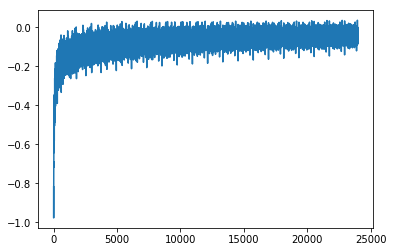

In [8]:
plt.plot(delta_hist)

## Todo: Step towards a NN-Framework
The presented implementation is compact and efficient, but hard to modify or extend. However, a modular design is crucial if you want to experiment with a neural network to understand the influence of its components. Now you make the first changes towards your own 'toy-neural-network-framework', which you should expand in the progress of the course. 

Rework the implementation from above given the classes and methods below. Again, you _do not_ have to re-engineer the whole neural network at this step. Rework the code to match the given specification and do necessary modifications only. For your understanding, you can change the names of the variables to more fitting ones.

Epoch: 0 Accuracy: 0.8714 Delta: -0.25308510008106155
Epoch: 1 Accuracy: 0.903 Delta: -0.2080229094639299
Epoch: 2 Accuracy: 0.9164 Delta: -0.18557346062938815
Epoch: 3 Accuracy: 0.925 Delta: -0.17055701544757415
Epoch: 4 Accuracy: 0.9307 Delta: -0.15859992094220263
Epoch: 5 Accuracy: 0.9348 Delta: -0.15025491155246695
Epoch: 6 Accuracy: 0.9395 Delta: -0.14319828145075855
Epoch: 7 Accuracy: 0.9429 Delta: -0.13808916608483668
Epoch: 8 Accuracy: 0.9456 Delta: -0.13402582701502105
Epoch: 9 Accuracy: 0.9485 Delta: -0.13011165476295097
Epoch: 10 Accuracy: 0.9507 Delta: -0.12647871199360097
Epoch: 11 Accuracy: 0.9523 Delta: -0.1231277670207775
Epoch: 12 Accuracy: 0.9536 Delta: -0.11989399492690342
Epoch: 13 Accuracy: 0.9552 Delta: -0.11734625144300069
Epoch: 14 Accuracy: 0.9561 Delta: -0.11486589588276669
Epoch: 15 Accuracy: 0.9573 Delta: -0.1129801808494811
Epoch: 16 Accuracy: 0.958 Delta: -0.11080671725810921
Epoch: 17 Accuracy: 0.9585 Delta: -0.10876858193213865
Epoch: 18 Accuracy: 0.9596

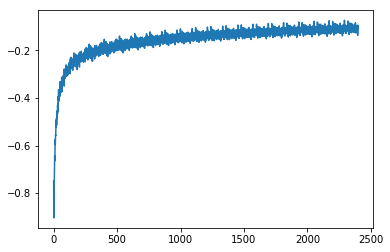

In [31]:
class FullyConnectedNetwork:
    def __init__(self, layers):
        self.layers = layers
        self.weights = [np.random.randn(*w) * 0.1 for w in self.layers]
        self.delta_hist = []
        self.grads = np.empty_like(self.weights)
        
        
    def forward(self, data):
        a = [data]
        for w in self.weights:
            a.append(np.maximum(a[-1].dot(w),0))
        return a

    def backward(self, X, Y):
        #Execute Forward
        a = self.forward(X)
        #Compute error on output
        delta = a[-1] - Y
        #stores its mean value to delta_history
        self.delta_hist.append(np.sum(delta * Y) / len(X))
        #stores as the last element the gradient of the next last element
        self.grads[-1] = a[-2].T.dot(delta)
        
        for i in range(len(a) - 2, 0, -1):
            #Compute actual error 
            delta = (a[i] > 0) * delta.dot(self.weights[i].T)
            #compute local gradient
            self.grads[i - 1] = a[i - 1].T.dot(delta)

        return self.grads / len(X)

    def predict(self, data):
        return self.forward(data)
            
class Optimizer:
    def __init__(self, network, train_data, train_labels, test_data=None, test_labels=None, 
                 epochs=100, batch_size=20, learning_rate=0.01):
        #Assign variables
        self.network = network
        self.train_data = train_data
        self.train_labels = train_labels
        self.test_data = test_data
        self.test_labels = test_labels
        self.epochs = epochs
        self.batch_size = batch_size
        self.learning_rate = learning_rate
        
    def sgd(self, verbose=False):
        """ Implements the stochastic gradient descent """
        for i in range(self.epochs):
            for j in range(0, len(self.train_data), self.batch_size):                
                X, Y = self.train_data[j:j + self.batch_size], self.train_labels[j:j + self.batch_size]
                self.network.weights -= self.learning_rate * self.network.backward(X, Y)
            prediction_test = np.argmax(self.network.predict(self.test_data)[-1], axis=1)
            if verbose: 
                print ('Epoch:', i, 
                       'Accuracy:', np.mean(prediction_test == np.argmax(self.test_labels, axis=1)), 
                       'Delta:', self.network.delta_hist[-1])     

    
# Following code should run:    
mnist_NN = FullyConnectedNetwork([(784, 200),(200,100),(100, 10)]) 
epochs, batch_size, learning_rate = 20, 500, 0.1
Optimizer(mnist_NN, train_images, train_labels, test_images, test_labels, epochs, batch_size, learning_rate).sgd(True)
plt.plot(mnist_NN.delta_hist)